In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
unet_df = pd.read_excel('results.xlsx', engine='openpyxl', sheet_name='Unet_resnet50', header=None)
unet_df.columns = ['scores']
fpn_df = pd.read_excel('results.xlsx', engine='openpyxl', sheet_name='FPN_se_resnext50_32x4d', header=None)
fpn_df.columns = ['scores']

In [3]:
unet_train = unet_df[unet_df['scores'].astype(str).str.contains("train")].reset_index(drop=True)
unet_train['dice_loss'] = unet_train['scores'].str.split('dice_loss -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].astype(float)
unet_train['iou_score'] = unet_train['scores'].str.split('iou_score -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].str.split(']', 1, expand=True)[0].astype(float)

In [4]:
unet_train.head()

,scores,dice_loss,iou_score
0,"train: 100%|██████████| 986/986 [15:32<00:00, ...",0.6063,0.3977
1,"train: 100%|██████████| 986/986 [16:19<00:00, ...",0.3453,0.5282
2,"train: 100%|██████████| 986/986 [16:22<00:00, ...",0.3229,0.5440
3,"train: 100%|██████████| 986/986 [16:21<00:00, ...",0.3099,0.5560
4,"train: 100%|██████████| 986/986 [16:28<00:00, ...",0.3176,0.5486


In [5]:
unet_valid = unet_df[unet_df['scores'].astype(str).str.contains("valid")].reset_index(drop=True)
unet_valid['dice_loss'] = unet_valid['scores'].str.split('dice_loss -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].astype(float)
unet_valid['iou_score'] = unet_valid['scores'].str.split('iou_score -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].str.split(']', 1, expand=True)[0].astype(float)

In [6]:
unet_valid.head()

,scores,dice_loss,iou_score
0,"valid: 100%|██████████| 69/69 [00:28<00:00, 2...",0.4467,0.4167
1,"valid: 100%|██████████| 69/69 [00:29<00:00, 2...",0.4529,0.3944
2,"valid: 100%|██████████| 69/69 [00:28<00:00, 2...",0.4321,0.4110
3,"valid: 100%|██████████| 69/69 [00:27<00:00, 2...",0.3580,0.4844
4,"valid: 100%|██████████| 69/69 [00:30<00:00, 2...",0.3922,0.4470


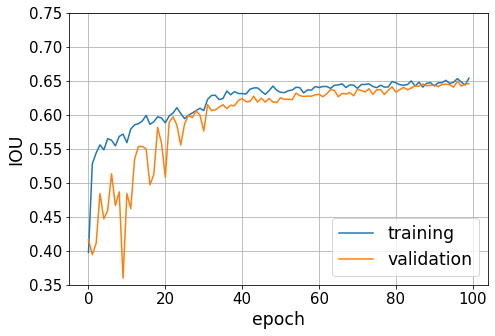

In [7]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_ylim([0.35, 0.75])
ax.plot(unet_train['iou_score'], label='training')
ax.plot(unet_valid['iou_score'], label='validation')
legend = ax.legend(loc='lower right', fontsize='xx-large')
ax.set_ylabel('IOU', fontsize='xx-large')
ax.set_xlabel('epoch', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()

In [8]:
fpn_train = fpn_df[fpn_df['scores'].astype(str).str.contains("train")].reset_index(drop=True)
fpn_train['dice_loss'] = fpn_train['scores'].str.split('dice_loss -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].astype(float)
fpn_train['iou_score'] = fpn_train['scores'].str.split('iou_score -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].str.split(']', 1, expand=True)[0].astype(float)

In [9]:
fpn_train.head()

,scores,dice_loss,iou_score
0,"train: 100%|██████████| 821/821 [07:26<00:00, ...",0.3653,0.4959
1,"train: 100%|██████████| 821/821 [07:32<00:00, ...",0.3028,0.5623
2,"train: 100%|██████████| 821/821 [07:27<00:00, ...",0.2865,0.5798
3,"train: 100%|██████████| 821/821 [07:28<00:00, ...",0.2788,0.5899
4,"train: 100%|██████████| 821/821 [07:26<00:00, ...",0.2733,0.5983


In [10]:
fpn_valid = fpn_df[fpn_df['scores'].astype(str).str.contains("valid")].reset_index(drop=True)
fpn_valid['dice_loss'] = fpn_valid['scores'].str.split('dice_loss -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].astype(float)
fpn_valid['iou_score'] = fpn_valid['scores'].str.split('iou_score -', 2, expand=True)[1].str.split(',', 1, expand=True)[0].str.split(']', 1, expand=True)[0].astype(float)

In [11]:
fpn_valid.head()

,scores,dice_loss,iou_score
0,"valid: 100%|██████████| 69/69 [00:15<00:00, 4...",0.3088,0.5423
1,"valid: 100%|██████████| 69/69 [00:15<00:00, 4...",0.2773,0.5780
2,"valid: 100%|██████████| 69/69 [00:14<00:00, 4...",0.2748,0.5860
3,"valid: 100%|██████████| 69/69 [00:15<00:00, 4...",0.2690,0.5927
4,"valid: 100%|██████████| 69/69 [00:15<00:00, 4...",0.2614,0.6003


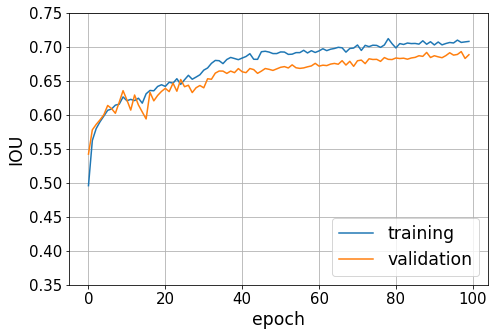

In [12]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_ylim([0.35, 0.75])
ax.plot(fpn_train['iou_score'], label='training')
ax.plot(fpn_valid['iou_score'], label='validation')
legend = ax.legend(loc='lower right', fontsize='xx-large')
ax.set_ylabel('IOU', fontsize='xx-large')
ax.set_xlabel('epoch', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()

In [1]:
import netCDF4
file2read = netCDF4.Dataset('./hurricane_images/OR_ABI-L1b-RadF-M3C13_G16_s20172440000341_e20172440011119_c20172440011175.nc','r')
print(file2read.variables.keys())    

odict_keys(['Rad', 'DQF', 't', 'y', 'x', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'yaw_flip_flag', 'band_id', 'band_wavelength', 'esun', 'kappa0', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'valid_pixel_count', 'missing_pixel_count', 'saturated_pixel_count', 'undersaturated_pixel_count', 'min_radiance_value_of_valid_pixels', 'max_radiance_value_of_valid_pixels', 'mean_radiance_value_of_valid_pixels', 'std_dev_radiance_value_of_valid_pixels', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'algorithm_dynamic_input_data_container', 'processing_parm_version_container', 'algorithm_product_version_container', 't_star_look', 'band_wavelength_star_look', 'star_id'])


In [36]:
file2read.variables['time_bounds']

<class 'netCDF4._netCDF4.Variable'>
float64 time_bounds(number_of_time_bounds)
    long_name: Scan start and end times in seconds since epoch (2000-01-01 12:00:00)
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
import xarray
dataset = xarray.open_dataset('./hurricane_images/OR_ABI-L1b-RadF-M3C13_G16_s20172440000341_e20172440011119_c20172440011175.nc', engine='netcdf4')

In [40]:
list(dataset['geospatial_lat_lon_extent'].attrs.values())[1:5]

[-170.7995, 81.3282, -8.2005, -81.3282]

In [5]:
import rasterio
from rasterio.plot import show
fp = r'/Users/shubhankar/Downloads/flood_data_geotiffs/geotiffs/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vh.tif'
img = rasterio.open(fp)

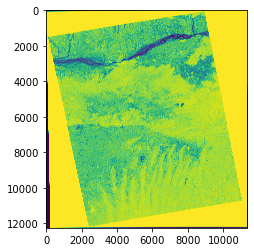

<AxesSubplot:>

In [6]:
show(img.read(1))

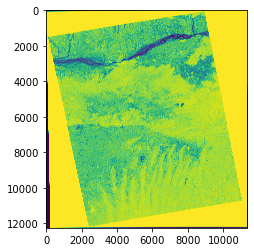

<AxesSubplot:>

In [7]:
show(img.read(2))

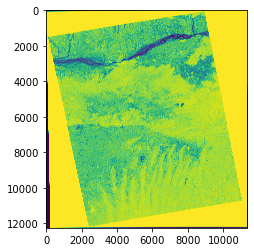

<AxesSubplot:>

In [8]:
show(img.read(3))

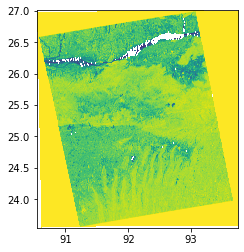

<AxesSubplot:>

In [10]:
show(img)

In [11]:
import numpy as np

In [23]:
np.array(img.read(3))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
from glob import glob

In [102]:
geotiffs = glob('flood_data_geotiffs/geotiffs/*')
labels = [label for label in glob('flood_data_processed/*/*/full_images/*') if 'label' in label]

In [103]:
len(geotiffs)

110

In [104]:
geotiffs[0]

'flood_data_geotiffs/geotiffs/redrivernorth_img_s1b_iw_rt30_20190410t002246_g_gpn_vv.tif'

In [105]:
timestamps = []
for label in labels:
    timestamps.append(label.split('_')[-2])

In [106]:
len(timestamps)

52

In [107]:
timestamps[:5]

['20180603t231344',
 '20180510t231343',
 '20180522t231344',
 '20180615t231345',
 '20181001t231350']

In [108]:
len(labels)

52

In [109]:
labels[0].split('_')

['flood',
 'data',
 'processed/test/florence',
 '20180603t231344/full',
 'images/florence',
 '20180603t231344',
 'label.png']

In [110]:
labels[0].split('_')[-2]

'20180603t231344'

In [111]:
vv_vh_geotiffs = []
for timestamp in timestamps:
    for geotiff in geotiffs:
        if timestamp in geotiff:
            vv_vh_geotiffs.append(geotiff)

In [113]:
len(vv_vh_geotiffs)

104

In [114]:
vv_vh_geotiffs

['flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180603t231344_g_gpn_vh.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180603t231344_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180510t231343_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180510t231343_g_gpn_vh.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180522t231344_g_gpn_vh.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180522t231344_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180615t231345_g_gpn_vh.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180615t231345_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20181001t231350_g_gpn_vh.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20181001t231350_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img_s1a_iw_rt30_20180919t231350_g_gpn_vv.tif',
 'flood_data_geotiffs/geotiffs/florence_img

In [115]:
labels

['flood_data_processed/test/florence_20180603t231344/full_images/florence_20180603t231344_label.png',
 'flood_data_processed/test/florence_20180510t231343/full_images/florence_20180510t231343_label.png',
 'flood_data_processed/test/florence_20180522t231344/full_images/florence_20180522t231344_label.png',
 'flood_data_processed/test/florence_20180615t231345/full_images/florence_20180615t231345_label.png',
 'flood_data_processed/test/florence_20181001t231350/full_images/florence_20181001t231350_label.png',
 'flood_data_processed/test/florence_20180919t231350/full_images/florence_20180919t231350_label.png',
 'flood_data_processed/test/florence_20180907t231350/full_images/florence_20180907t231350_label.png',
 'flood_data_processed/test/florence_20180721t231347/full_images/florence_20180721t231347_label.png',
 'flood_data_processed/test/florence_20180709t231346/full_images/florence_20180709t231346_label.png',
 'flood_data_processed/test/florence_20180802t231348/full_images/florence_20180802

In [121]:
folders = []
for label in labels:
    folders.append(label.split('/')[2])

In [123]:
folders[:2]

['florence_20180603t231344', 'florence_20180510t231343']

In [161]:
import os
for folder in folders:
    path = f'./flood_data_final/{folder}'
    os.makedirs(path, exist_ok=True)

In [162]:
import shutil
for source in labels:
    dst = os.path.join('./flood_data_final', source.split('/')[2]+'/')
    shutil.copy2(source, dst)

In [163]:
for source_gtiff in vv_vh_geotiffs:
    dst = os.path.join('./flood_data_final', source_gtiff.split('/')[-1].split('_')[0]+'_'+source_gtiff.split('/')[-1].split('_')[-4]+'/')
    shutil.copy2(source_gtiff, dst)

In [168]:
import rasterio

dataset = rasterio.open('flood_data_geotiffs/geotiffs/redrivernorth_img_s1b_iw_rt30_20190528t002248_g_gpn_vh.tif')

In [169]:
dataset.bounds

BoundingBox(left=-100.02620787180777, bottom=47.03640485587751, right=-96.07843112267727, top=49.01047285446447)

In [170]:
dataset.lnglat()

(-98.05231949724252, 48.02343885517099)

In [173]:
dataset.crs

CRS.from_epsg(4326)

In [174]:
dataset.nodatavals

(0.0, 0.0, 0.0)

In [175]:
dataset.nodata

0.0